In [45]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

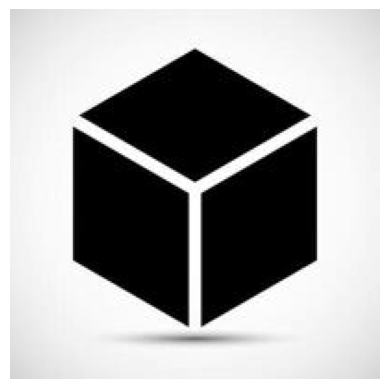

Dimenzije slike: (200, 200)


In [46]:
img = Image.open("data/exemple.jpg").convert("L")  # "L" = grayscale

plt.imshow(img, cmap="gray")
plt.axis("off")
plt.show()

img_array = np.array(img)
print("Dimenzije slike:", img_array.shape)


In [47]:
binary_matrix = np.where(img_array < 128, 1, 0)


print(binary_matrix)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [48]:
def init(binary_matrix1):
    rectangles = [] 
    H = len(binary_matrix1)         # broj redova
    W = len(binary_matrix1[0])      # broj kolona
    for i in range(H):
        for j in range(W):
            if binary_matrix1[i][j]:  # ako je 1, crni piksel
                rectangles.append([i, j, 1, 1])
    return rectangles, len(rectangles)


In [49]:
def calcSolutionValue(newRectangles):
    return len(newRectangles)

In [50]:
def merge_rect(R1, R2):
    x1, y1, h1, w1 = R1
    x2, y2, h2, w2 = R2
    x_new = min(x1, x2)
    y_new = min(y1, y2)
    h_new = max(x1+h1, x2+h2) - x_new
    w_new = max(y1+w1, y2+w2) - y_new
    return (x_new, y_new, h_new, w_new)

In [51]:
def can_merge(R1, R2, matrix):
    x1, y1, h1, w1 = R1
    x2, y2, h2, w2 = R2
    
    # horizontalno spajanje
    if x1 == x2 and h1 == h2:
        min_y = min(y1, y2)
        max_y = max(y1+w1, y2+w2)
        if np.all(matrix[x1:x1+h1, min_y:max_y]):
            return True
    # vertikalno spajanje
    if y1 == y2 and w1 == w2:
        min_x = min(x1, x2)
        max_x = max(x1+h1, x2+h2)
        if np.all(matrix[min_x:max_x, y1:y1+w1]):
            return True
    return False

In [62]:
def local_search():
    rectangles, currValue = init(binary_matrix)
    bestValue = currValue
    improved = True
    rectangles.sort(key=lambda r: (r[0], r[1]))

    while improved:
        improved = False

        for i in range(len(rectangles)):
            for j in range(i+1, min(i+50, len(rectangles))): # heuristika, provervamo samo bliske
                if can_merge(rectangles[i], rectangles[j],binary_matrix):
                    # spoji pravougaonike
                    new_rect = merge_rect(rectangles[i], rectangles[j])
                    
                    # kreiraj novu listu sa spojenim pravougaonikom
                    newRectangles = rectangles[:i] + rectangles[i+1:j] + rectangles[j+1:] + [new_rect]
                    
                    newValue = calcSolutionValue(newRectangles)

                    # prihvati samo ako je bolje
                    if newValue < currValue:
                        currValue = newValue
                        rectangles = newRectangles
                        improved = True
                        
                        if newValue < bestValue:
                            bestValue = newValue
                        
                        break  # primeni prvo poboljšanje i ponovi
            if improved:
                break
    
    return rectangles, bestValue




In [ ]:
rectangles, bestValue = local_search()

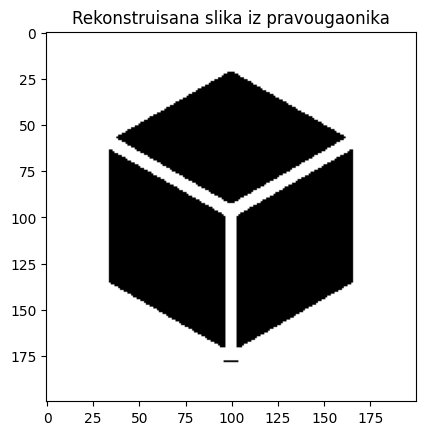

In [60]:
H, W = binary_matrix.shape

reconstructed = np.zeros((H, W), dtype=int)

for r in rectangles:
    x, y, h, w = r
    reconstructed[x:x+h, y:y+w] = 1  

plt.imshow(1 - reconstructed, cmap='gray')
plt.title("Rekonstruisana slika iz pravougaonika")
plt.show()